In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [2]:
N=1000
gaussian_quantiles=make_gaussian_quantiles(mean=None,
                        cov=0.1,
                        n_samples=N,
                        n_features=2,
                        n_classes=2,
                        shuffle=True,
                        random_state=None)
X,Y=gaussian_quantiles

In [3]:
X.shape

(1000, 2)

In [4]:
Y.shape

(1000,)

In [5]:
Y=Y[:, np.newaxis]

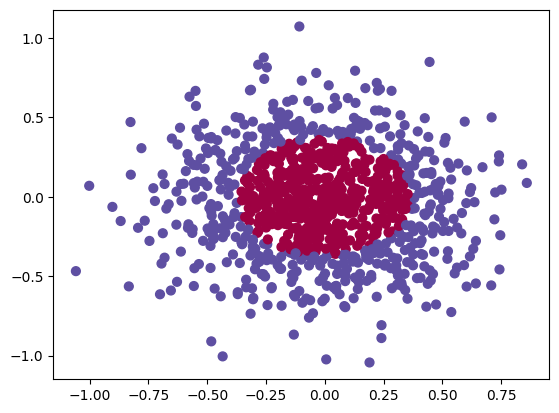

In [6]:
plt.scatter(X[:,0],X[:,1],c=Y[:,0], s=40, cmap=plt.cm.Spectral)

#Funciones de activacion

In [7]:
def sigmoid(x, derivate=False):
  if derivate:
    return np.exp(-x)/((1+np.exp(-x))**2)
  else:
    return 1/(1+np.exp(-x))

In [8]:
def relu(x, derivate=False):
  if derivate:
    return 1*(x>0)
  else:
    return np.maximum(x,0)

#Funcion de perdidad

In [9]:
def mse(y, y_hat, derivate = False):
  if derivate:
    return (y_hat - y)
  else:
    return np.mean((y_hat - y)**2)

In [10]:
def inizilize_parameters_deep(layers_dim):
  parameters = {}
  L = len(layers_dim)
  for l in range(0,L-1):
    parameters['W' + str(l+1)] = (np.random.randn(layers_dim[l], layers_dim[l+1]) * 2)-1
    parameters['b' + str(l+1)] = (np.random.randn(1, layers_dim[l+1]) * 2)-1
  return parameters

In [11]:
layer_dims=[2,4,8,1]
params=inizilize_parameters_deep(layer_dims)
params

{'W1': array([[ 1.74786872,  0.60443895, -1.62088056,  0.10412901],
        [-1.65794876, -1.14626284,  0.21452725,  2.08550351]]),
 'b1': array([[-0.50851186,  0.32560825, -2.17583492, -0.76105067]]),
 'W2': array([[-1.63396569,  1.88003319, -3.34153696, -0.88662445, -1.64114876,
         -0.92030583, -0.62667116, -3.28113714],
        [ 1.64605816, -1.21858721, -1.39262162, -3.43088724, -0.91465222,
         -1.89618557, -0.06194771,  0.7064512 ],
        [-4.99705246, -2.92247687,  2.22334329,  1.20880413,  1.33290993,
         -4.82819182, -2.72872648, -1.28218799],
        [-1.94814108,  1.42011997, -1.06453507,  0.28554454, -1.26039576,
         -0.76154525,  0.63384452,  0.12761397]]),
 'b2': array([[-0.18680439, -2.23804204, -1.66613747,  1.64541888, -2.92215558,
          3.74976198, -3.30260772, -4.8683617 ]]),
 'W3': array([[-3.833317  ],
        [-1.63045628],
        [ 0.48508536],
        [ 0.25410906],
        [-1.7396603 ],
        [-2.34274429],
        [-0.67920559],


#Entrenamiento hacia delante

In [12]:
params['W1'].shape

(2, 4)

##Producto punto

In [13]:
np.matmul(X,params['W1'])

array([[ 0.66259351,  0.25616747, -0.55203079, -0.06358957],
       [-0.527336  , -0.28022765,  0.26303216,  0.34170549],
       [ 0.37968485,  0.25315411, -0.07071971, -0.44195082],
       ...,
       [-0.48331958, -0.18158693,  0.41484243,  0.02628922],
       [-0.9545137 , -0.39142689,  0.74351668,  0.17700304],
       [-0.02994219, -0.10023081, -0.17977263,  0.34087292]])

In [14]:
X@params['W1']

array([[ 0.66259351,  0.25616747, -0.55203079, -0.06358957],
       [-0.527336  , -0.28022765,  0.26303216,  0.34170549],
       [ 0.37968485,  0.25315411, -0.07071971, -0.44195082],
       ...,
       [-0.48331958, -0.18158693,  0.41484243,  0.02628922],
       [-0.9545137 , -0.39142689,  0.74351668,  0.17700304],
       [-0.02994219, -0.10023081, -0.17977263,  0.34087292]])

In [15]:
params
params['A0']=X
params['Z1']=np.matmul(params['A0'],params['W1'])+params['b1']
params['A1']=relu(params['Z1'])
params['Z2']=np.matmul(params['A1'],params['W2'])+params['b2']
params['A2']=relu(params['Z2'])
params['Z3']=np.matmul(params['A2'],params['W3'])+params['b3']
params['A3']=sigmoid(params['Z3'])

output=params['A3']

In [16]:
output.shape

(1000, 1)

In [17]:
params['W1'].shape

(2, 4)

In [18]:
X.shape

(1000, 2)

In [19]:
np.matmul(X,params['W1']).shape

(1000, 4)

In [20]:
X@params['W1'].shape

array([ 4.79922228e-01,  4.03949017e-01, -8.19793136e-01, -1.42029883e+00,
       -2.73923716e-02,  2.09704507e-01,  2.27298843e-01, -2.02924501e+00,
        4.66216293e-01,  1.06593830e+00, -2.97938093e-01, -2.14274555e-01,
        9.21036085e-01, -5.01213332e-01,  1.52640260e+00, -1.65055125e-01,
        1.54677806e+00, -2.23411332e+00,  1.09792445e+00,  1.41041411e+00,
        9.04105621e-01, -6.02236643e-01, -1.25231348e+00,  8.12420621e-01,
       -3.99005865e+00,  1.08017429e+00, -1.72720386e+00,  9.28397551e-01,
        5.77920027e-01, -7.78780595e-01, -9.81952673e-01,  1.40735193e+00,
       -4.88450836e-01, -6.79889852e-01,  2.49463353e+00,  9.36915116e-02,
       -3.02510376e-01, -2.36959921e+00,  9.19265777e-01, -3.57742100e+00,
        4.07484376e-01, -2.65309887e+00,  4.12449750e-02, -2.85978775e-01,
       -1.00427878e+00,  5.21976587e-01,  1.04853172e+00, -6.43268660e-01,
       -1.89917175e+00, -1.04080049e+00,  1.48593678e+00,  1.63429969e+00,
        6.30187919e-01,  

In [28]:
#fordward
def train(x_data,lr,params, training=True):
  params['A0']=x_data
  params['Z1']=np.matmul(params['A0'],params['W1'])+params['b1']
  params['A1']=relu(params['Z1'])

  params['Z2']=np.matmul(params['A1'],params['W2'])+params['b2']
  params['A2']=relu(params['Z2'])

  #la probabilidad se maneja mejor con el sigmoide
  params['Z3']=np.matmul(params['A2'],params['W3'])+params['b3']
  params['A3']=sigmoid(params['Z3'])

  output=params['A3']
  if training:
    #backpropagation
    params['dZ3']=mse(Y,output,derivate=True)*sigmoid(params['A3'],derivate=True)
    params['dW3']=np.matmul(params['A2'].T,params['dZ3'])

    params['dZ2']=np.matmul(params['dZ3'],params['W3'].T) *relu(params['A2'],derivate=True)
    params['dW2']=np.matmul(params['A1'].T,params['dZ2'])

    params['dZ1']=np.matmul(params['dZ2'],params['W2'].T) *relu(params['A1'],derivate=True)
    params['dW1']=np.matmul(params['A0'].T,params['dZ1'])

    #Gradient decent
    params['W3']=params['W3']-params['dW3']*lr
    params['b3']=params['b3']-np.mean(params['dZ3'], axis=0, keepdims=True)*lr

    params['W2']=params['W2']-params['dW2']*lr
    params['b2']=params['b2']-(np.mean(params['dZ2'], axis=0, keepdims=True))*lr

    params['W1']=params['W1']-params['dW1']*lr
    params['b1']=params['b1']-(np.mean(params['dZ1'], axis=0, keepdims=True))*lr
  return output

In [47]:
#Entrenameinto y analisis de resultados de tu red neuronal
layer_dims=[2,4,8,1]
params=inizilize_parameters_deep(layer_dims)
errors=[]
for _ in range(90000):
  output=train(X,0.00001,params)
  if _%50==0:
    print(mse(Y,output))
    errors.append(mse(Y,output))

0.3070054044273986
0.29919282428417504
0.2909335795089802
0.28255321894459157
0.27411569878749414
0.26595697075175967
0.2581013438565896
0.2506030789291682
0.24335804453681736
0.23636813512689298
0.2297329172424725
0.22359787945680745
0.21811444250970327
0.2131081212599239
0.20858771245473082
0.2046068312014715
0.2010709049518226
0.1979760065245114
0.19528804896696322
0.1930495593345956
0.19118734845727603
0.18964327004209255
0.1883121449854144
0.18721891128927642
0.18622517924257415
0.18532486555569555
0.18452846449913543
0.18381935526251095
0.1831949646103776
0.1826280894715437
0.18212119846583208
0.18166880036718772
0.18124398123254035
0.18085898721026022
0.18048519716768777
0.18011346357867716
0.17975134522528186
0.1794093475979201
0.17908299976410103
0.1787679671835906
0.17845734673468128
0.17815128875578484
0.17784855658511628
0.17754868153607492
0.177246502733007
0.17694353931964427
0.17664364933450497
0.17634463430724195
0.1760405174941747
0.1757322194233128
0.17541358703529294

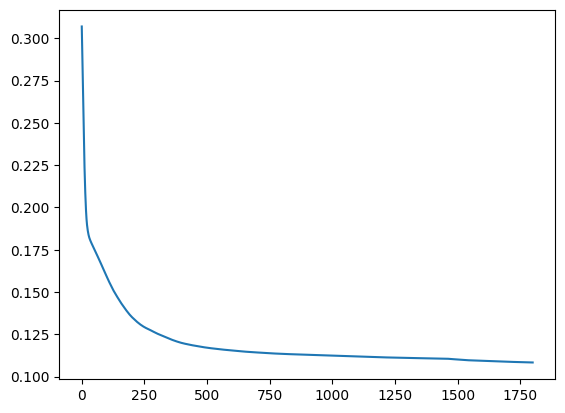

In [48]:
plt.plot(errors)

In [53]:
data_test=(np.random.randn(1000,2)*2)-1
y=train(data_test,0.001,params,training=False)#solo queremos que haga predicciones

In [54]:
y=np.where(y>0.5,1,0)

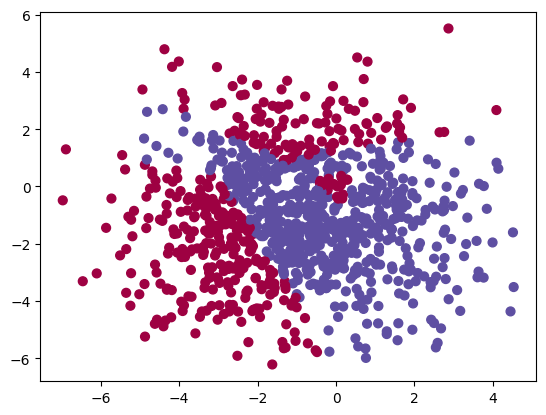

In [55]:
plt.scatter(data_test[:,0],data_test[:,1],c=y[:,0], s=40, cmap=plt.cm.Spectral)

In [57]:
x = np.array(42)
x.ndim

0

In [59]:
x = np.array([42,23,453,21,32,1,3,7])
x

array([ 42,  23, 453,  21,  32,   1,   3,   7])